In [247]:
import pandas as pd

#### INSPECTING DATA STRUCTURE

In [248]:
data = pd.read_csv('ObesityDataSet.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [249]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [250]:
# Checking the uniqueness of some fields and null values
data['family_history_with_overweight'].unique(), data['FAVC'].unique(),data['CAEC'].unique(),data['SMOKE'].unique(),data['SCC'].unique(), data['CALC'].unique(),data['MTRANS'].unique(),data['NObeyesdad'].unique()

(array(['yes', 'no'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object),
 array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
        'Bike'], dtype=object),
 array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
        'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
        'Obesity_Type_III'], dtype=object))

#### ENCODING VARIABLES

In [251]:
# Creating a LabelEncoder object
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()

# Labelling encode binary variables
for column in ['Gender', 'SMOKE', 'family_history_with_overweight']:
  data[column] = label_encoder.fit_transform(data[column])

In [252]:
# Creating a OneHotEncoder object
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# One-hot encode multi-class variables
for column in ['MTRANS', 'NObeyesdad']:
  encoded_data = onehot_encoder.fit_transform(data[[column]])
  encoded_df = pd.DataFrame(encoded_data, columns=[f'{column}_{i}' for i in range(encoded_data.shape[1])])
  data = pd.concat([data, encoded_df], axis=1)
  data = data.drop(column, axis=1)

# Print the updated DataFrame
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS_2,MTRANS_3,MTRANS_4,NObeyesdad_0,NObeyesdad_1,NObeyesdad_2,NObeyesdad_3,NObeyesdad_4,NObeyesdad_5,NObeyesdad_6
0,0,21.0,1.62,64.0,1,no,2.0,3.0,Sometimes,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,21.0,1.52,56.0,1,no,3.0,3.0,Sometimes,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,23.0,1.80,77.0,1,no,2.0,3.0,Sometimes,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,27.0,1.80,87.0,0,no,3.0,3.0,Sometimes,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,22.0,1.78,89.8,0,no,2.0,1.0,Sometimes,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [253]:
print ("Age", data['Age'].min(), data['Age'].max())
print ("Height", data['Height'].min(), data['Height'].max())
print ("Weight", data['Weight'].min(), data['Weight'].max())


Age 14.0 61.0
Height 1.45 1.98
Weight 39.0 173.0


In [254]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS_0', 'MTRANS_1', 'MTRANS_2', 'MTRANS_3', 'MTRANS_4',
       'NObeyesdad_0', 'NObeyesdad_1', 'NObeyesdad_2', 'NObeyesdad_3',
       'NObeyesdad_4', 'NObeyesdad_5', 'NObeyesdad_6'],
      dtype='object')

#### DETECTION And HANDLING OUTLIERS

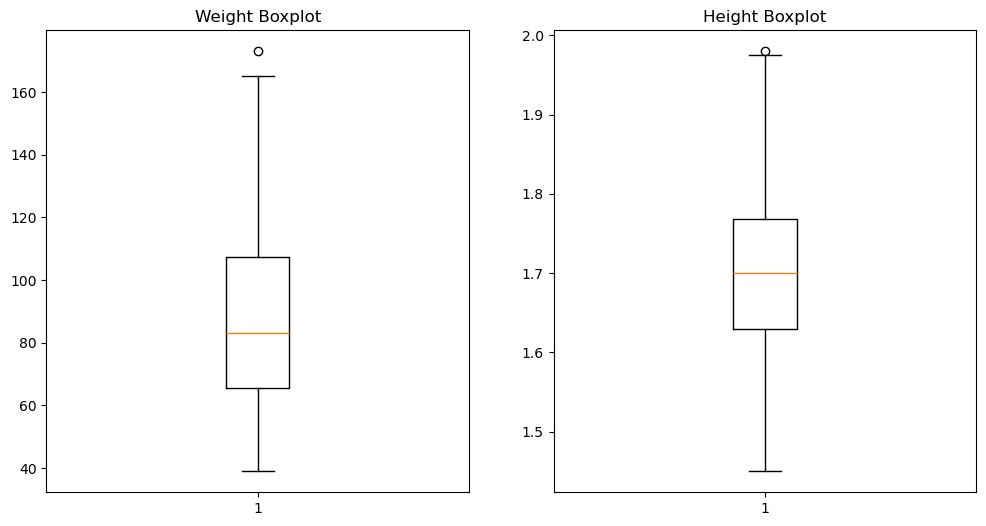

In [255]:
import matplotlib.pyplot as plt

# Creating boxplots for Weight and Height
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data['Weight'])
plt.title('Weight Boxplot')

plt.subplot(1, 2, 2)
plt.boxplot(data['Height'])
plt.title('Height Boxplot')

plt.show()

In [256]:
# Function to handle outliers by capping
def cap_outliers(data, column, lower_percentile=1, upper_percentile=99):
  lower_bound = data[column].quantile(lower_percentile / 100)
  upper_bound = data[column].quantile(upper_percentile / 100)
  data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
  return data

In [257]:
# Handling outliers in Weight and Height by capping
data = cap_outliers(data, 'Weight')
data = cap_outliers(data, 'Height')

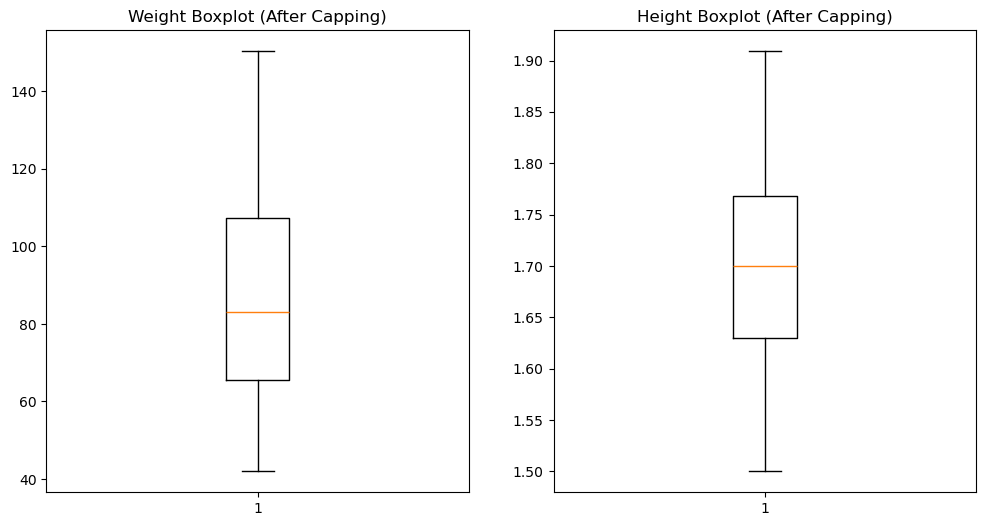

In [258]:
# Creating boxplots again to visualize the effect of outlier handling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data['Weight'])
plt.title('Weight Boxplot (After Capping)')

plt.subplot(1, 2, 2)
plt.boxplot(data['Height'])
plt.title('Height Boxplot (After Capping)')

plt.show()

#### NORMALIZATION

In [259]:
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler object
scaler = MinMaxScaler()

# Selecting the continuous variables to be normalized
continuous_vars = ['Age', 'Weight', 'Height','FAF', 'CH2O', 'TUE']

# Fit and transform the selected variables
data[continuous_vars] = scaler.fit_transform(data[continuous_vars])

# Printing the first few rows of the DataFrame to verify the normalization
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS_2,MTRANS_3,MTRANS_4,NObeyesdad_0,NObeyesdad_1,NObeyesdad_2,NObeyesdad_3,NObeyesdad_4,NObeyesdad_5,NObeyesdad_6
0,0,0.148936,0.293014,0.203077,1,no,2.0,3.0,Sometimes,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,0.148936,0.048430,0.129231,1,no,3.0,3.0,Sometimes,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.191489,0.733267,0.323077,1,no,2.0,3.0,Sometimes,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.276596,0.733267,0.415384,0,no,3.0,3.0,Sometimes,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.170213,0.684350,0.441231,0,no,2.0,1.0,Sometimes,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### SUMMARY STATISTICS

In [260]:
import numpy as np

# Defining the original min and max values
age_min = 14
age_max = 61
height_min = 1.45 
height_max = 1.98
weight_min = 39.0 
weight_max = 173.0


normalized_values = np.linspace(0, 1, num=11) 
original_age = (normalized_values * (age_max - age_min)) + age_min
original_height = (normalized_values * (height_max - height_min)) + height_min
original_weight = (normalized_values * (weight_max - weight_min)) + weight_min


# Create a reference table using pandas
reference_table = pd.DataFrame({
    'Normalized Value': normalized_values,
    'Corresponding Original Age': original_age,
    'Corresponding Original Height': original_height,
    'Corresponding Original Weight': original_weight

})
print(reference_table)


    Normalized Value  Corresponding Original Age  \
0                0.0                        14.0   
1                0.1                        18.7   
2                0.2                        23.4   
3                0.3                        28.1   
4                0.4                        32.8   
5                0.5                        37.5   
6                0.6                        42.2   
7                0.7                        46.9   
8                0.8                        51.6   
9                0.9                        56.3   
10               1.0                        61.0   

    Corresponding Original Height  Corresponding Original Weight  
0                           1.450                           39.0  
1                           1.503                           52.4  
2                           1.556                           65.8  
3                           1.609                           79.2  
4                           1.662       

In [261]:
# Generating summary statistics for normalized continuous variables
continuous_stats = data[continuous_vars].describe()
print(continuous_stats)

               Age       Weight       Height          FAF         CH2O  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.219417     0.411229     0.492595     0.336766     0.504006   
std       0.135021     0.240426     0.226706     0.283531     0.306477   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.126536     0.216677     0.317473     0.041502     0.292406   
50%       0.186764     0.378461     0.489903     0.333333     0.500000   
75%       0.255319     0.603975     0.656135     0.555559     0.738710   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               TUE  
count  2111.000000  
mean      0.328933  
std       0.304464  
min       0.000000  
25%       0.000000  
50%       0.312675  
75%       0.500000  
max       1.000000  


#### DISTRIBUTION ANALYSIS

C:\Users\Nas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


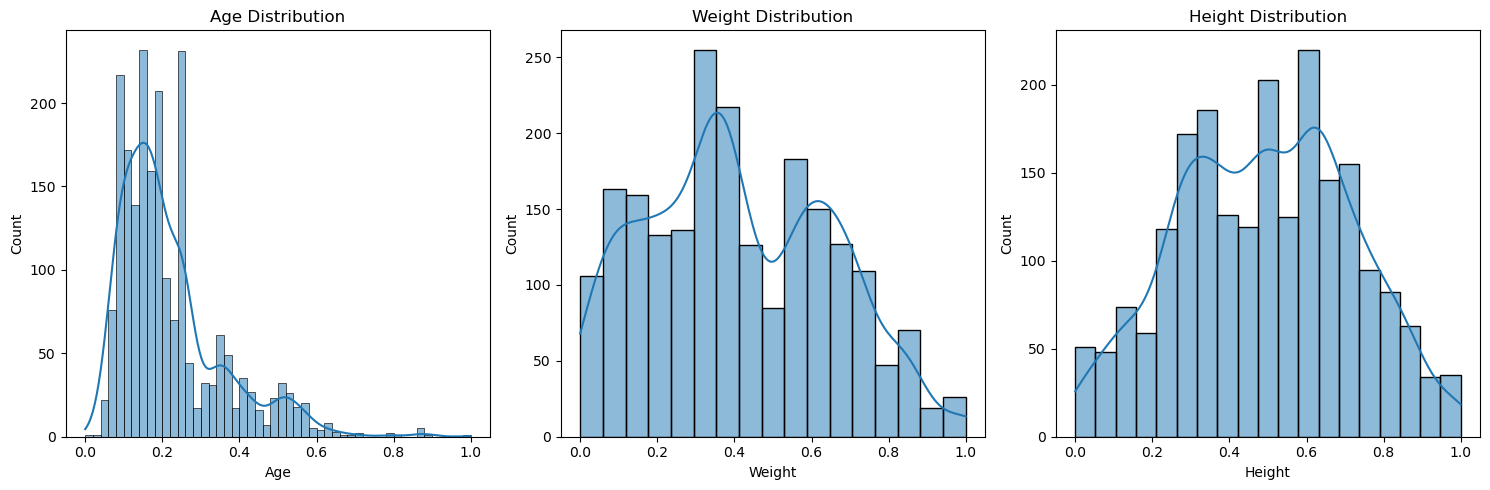

In [262]:
import seaborn as sns

# Creating histograms and KDE plots for Age, Weight, and Height
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Weight'], kde=True)
plt.title('Weight Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Height'], kde=True)
plt.title('Height Distribution')

plt.tight_layout()
plt.show()

#### EXPLORE RELATIONSHIPS

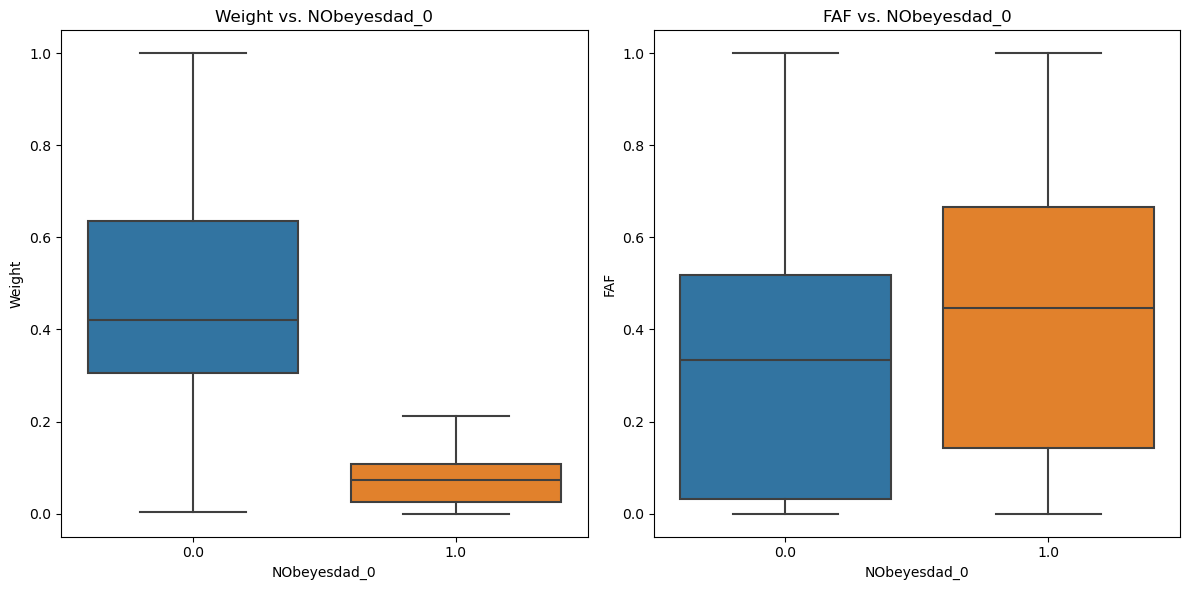

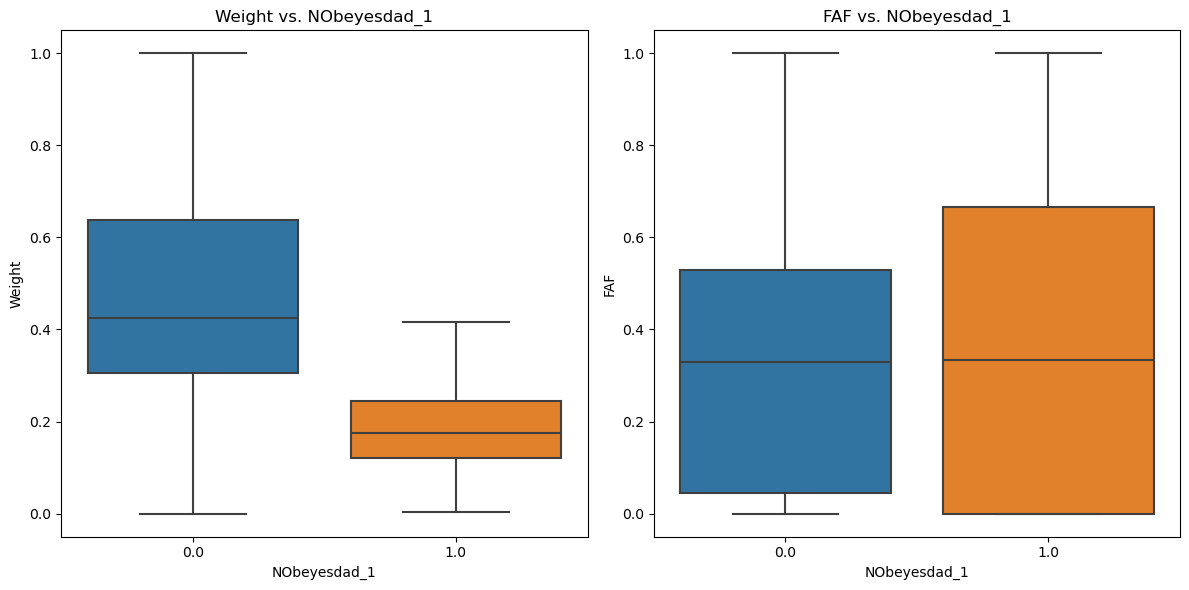

In [263]:
# Create box plots to explore relationships between Weight, FAF, and NObeyesdad
# Example for NObeyesdad_0
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='NObeyesdad_0', y='Weight', data=data)
plt.title('Weight vs. NObeyesdad_0')

plt.subplot(1, 2, 2)
sns.boxplot(x='NObeyesdad_0', y='FAF', data=data)
plt.title('FAF vs. NObeyesdad_0')

plt.tight_layout()
plt.show()


# Example for NObeyesdad_1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='NObeyesdad_1', y='Weight', data=data)
plt.title('Weight vs. NObeyesdad_1')

plt.subplot(1, 2, 2)
sns.boxplot(x='NObeyesdad_1', y='FAF', data=data)
plt.title('FAF vs. NObeyesdad_1')

plt.tight_layout()
plt.show()

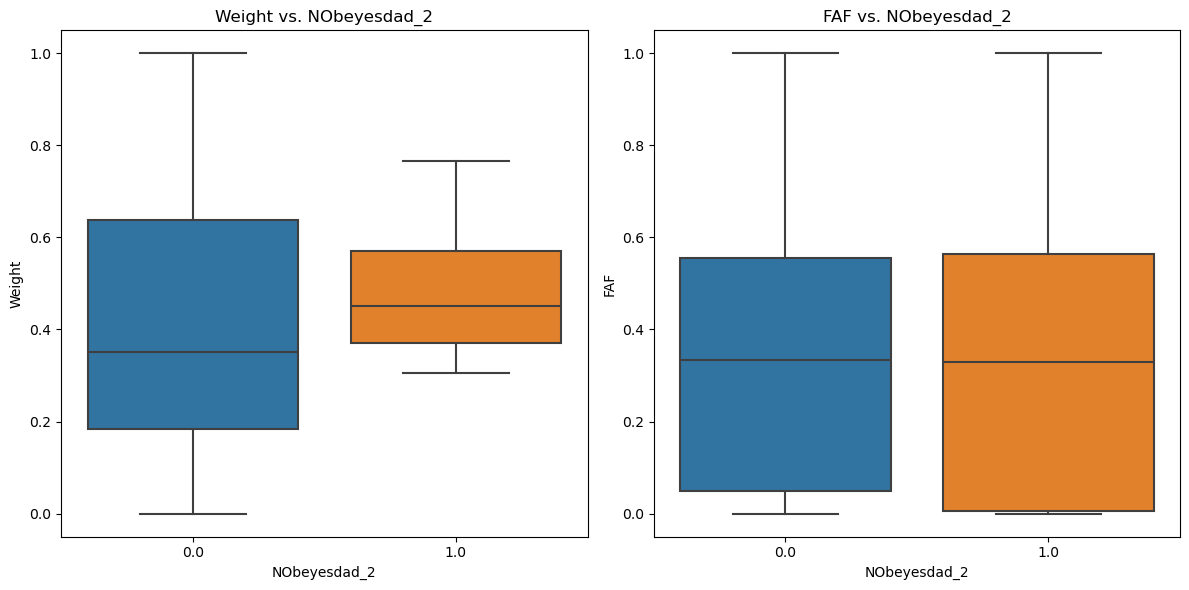

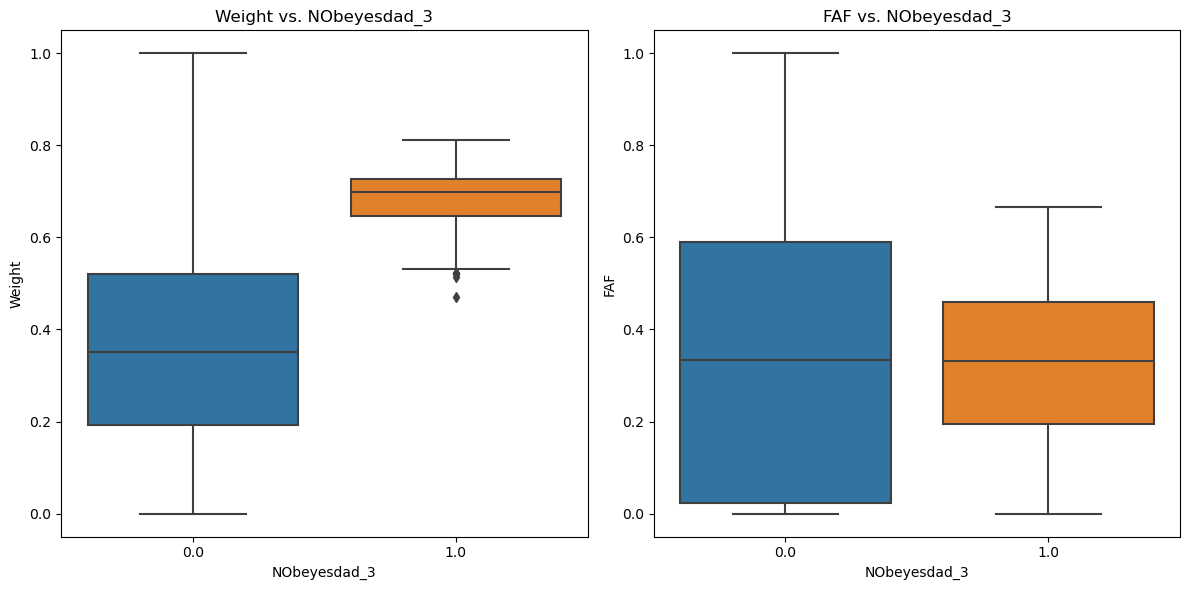

In [264]:
# Example for NObeyesdad_2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='NObeyesdad_2', y='Weight', data=data)
plt.title('Weight vs. NObeyesdad_2')

plt.subplot(1, 2, 2)
sns.boxplot(x='NObeyesdad_2', y='FAF', data=data)
plt.title('FAF vs. NObeyesdad_2')

plt.tight_layout()
plt.show()


# Example for NObeyesdad_3
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='NObeyesdad_3', y='Weight', data=data)
plt.title('Weight vs. NObeyesdad_3')

plt.subplot(1, 2, 2)
sns.boxplot(x='NObeyesdad_3', y='FAF', data=data)
plt.title('FAF vs. NObeyesdad_3')

plt.tight_layout()
plt.show()

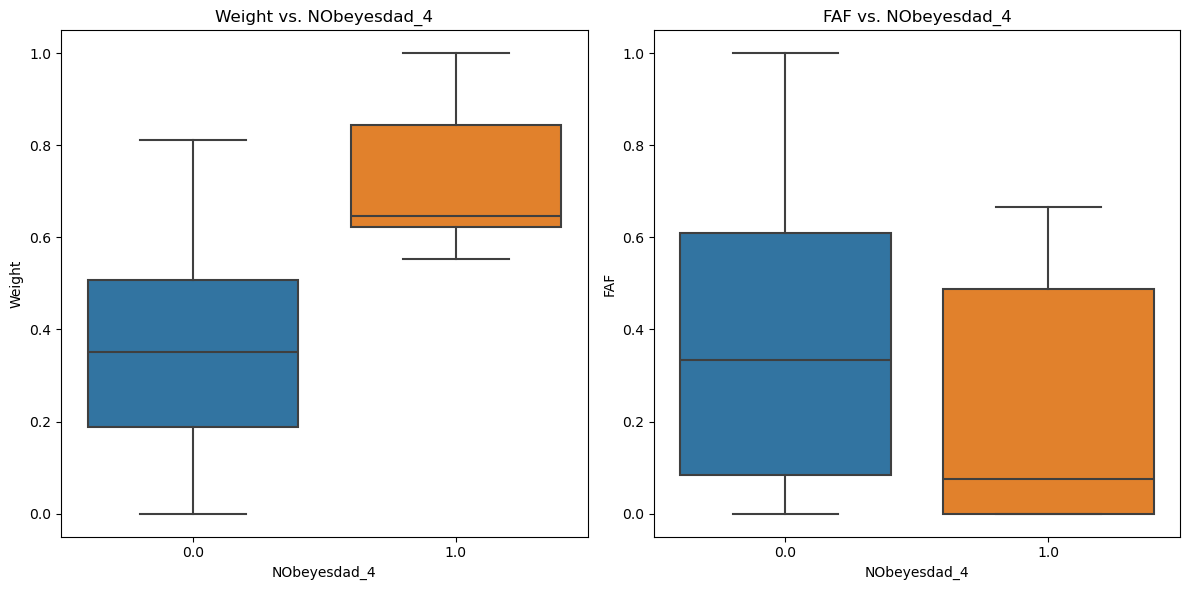

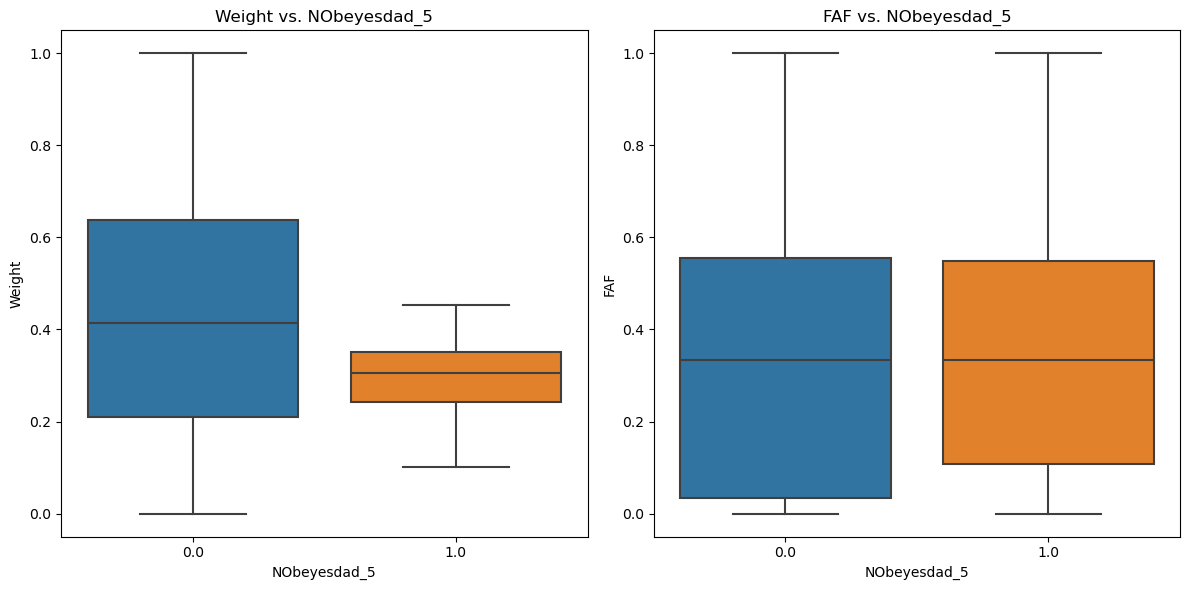

In [265]:
# Example for NObeyesdad_4
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='NObeyesdad_4', y='Weight', data=data)
plt.title('Weight vs. NObeyesdad_4')

plt.subplot(1, 2, 2)
sns.boxplot(x='NObeyesdad_4', y='FAF', data=data)
plt.title('FAF vs. NObeyesdad_4')

plt.tight_layout()
plt.show()


# Example for NObeyesdad_5
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='NObeyesdad_5', y='Weight', data=data)
plt.title('Weight vs. NObeyesdad_5')

plt.subplot(1, 2, 2)
sns.boxplot(x='NObeyesdad_5', y='FAF', data=data)
plt.title('FAF vs. NObeyesdad_5')

plt.tight_layout()
plt.show()

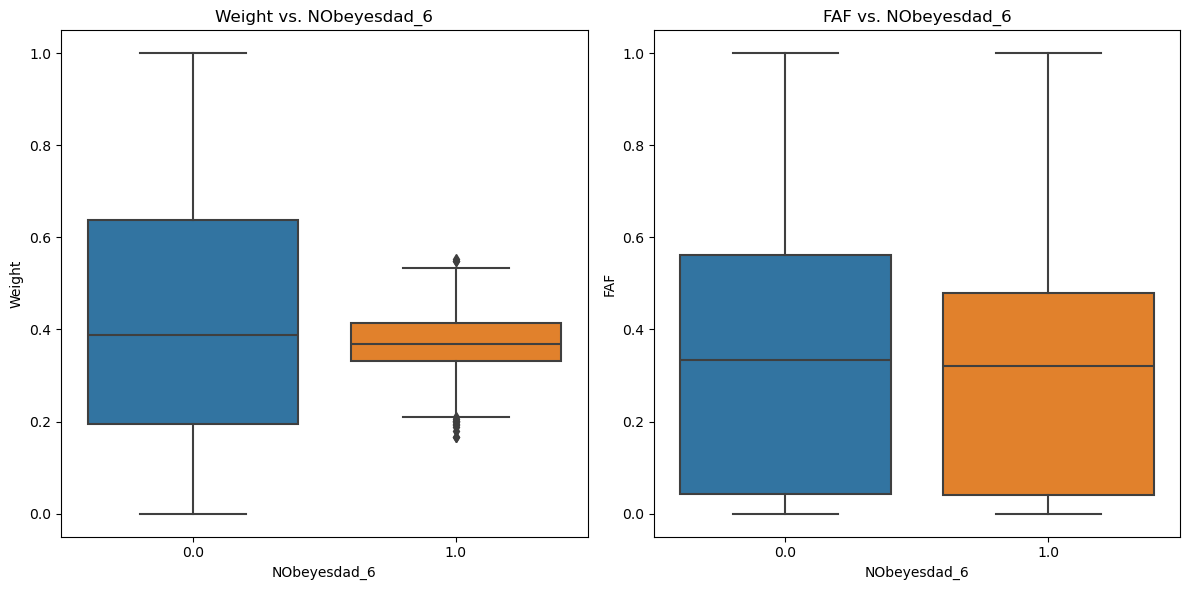

In [266]:
# Example for NObeyesdad_6
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='NObeyesdad_6', y='Weight', data=data)
plt.title('Weight vs. NObeyesdad_6')

plt.subplot(1, 2, 2)
sns.boxplot(x='NObeyesdad_6', y='FAF', data=data)
plt.title('FAF vs. NObeyesdad_6')

plt.tight_layout()
plt.show()

### CORRELATION

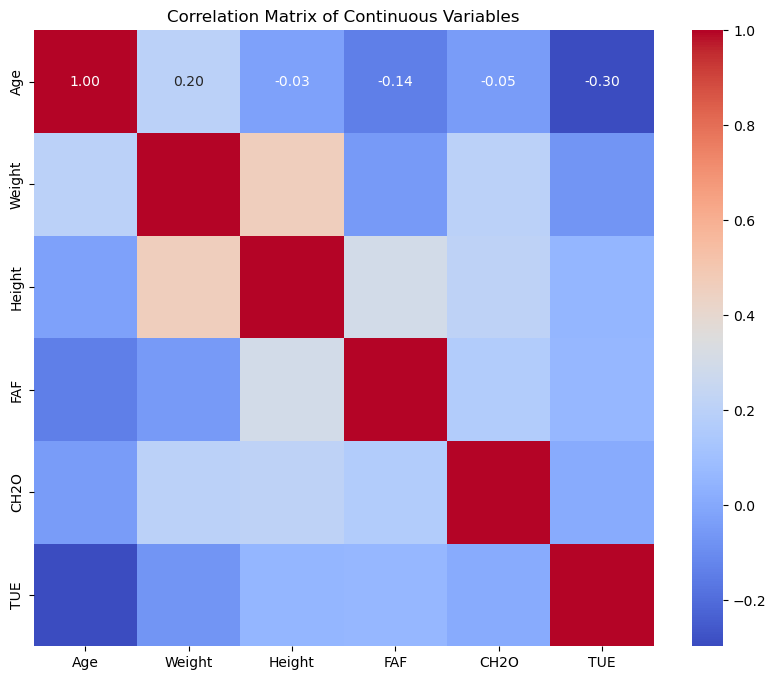

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the continuous variables for correlation analysis
continuous_vars = ['Age', 'Weight', 'Height', 'FAF', 'CH2O', 'TUE']

# Calculate the correlation matrix
correlation_matrix = data[continuous_vars].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

In [268]:
onehot_encoder.categories_[0]

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

### Machine learning

C:\Users\Nas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

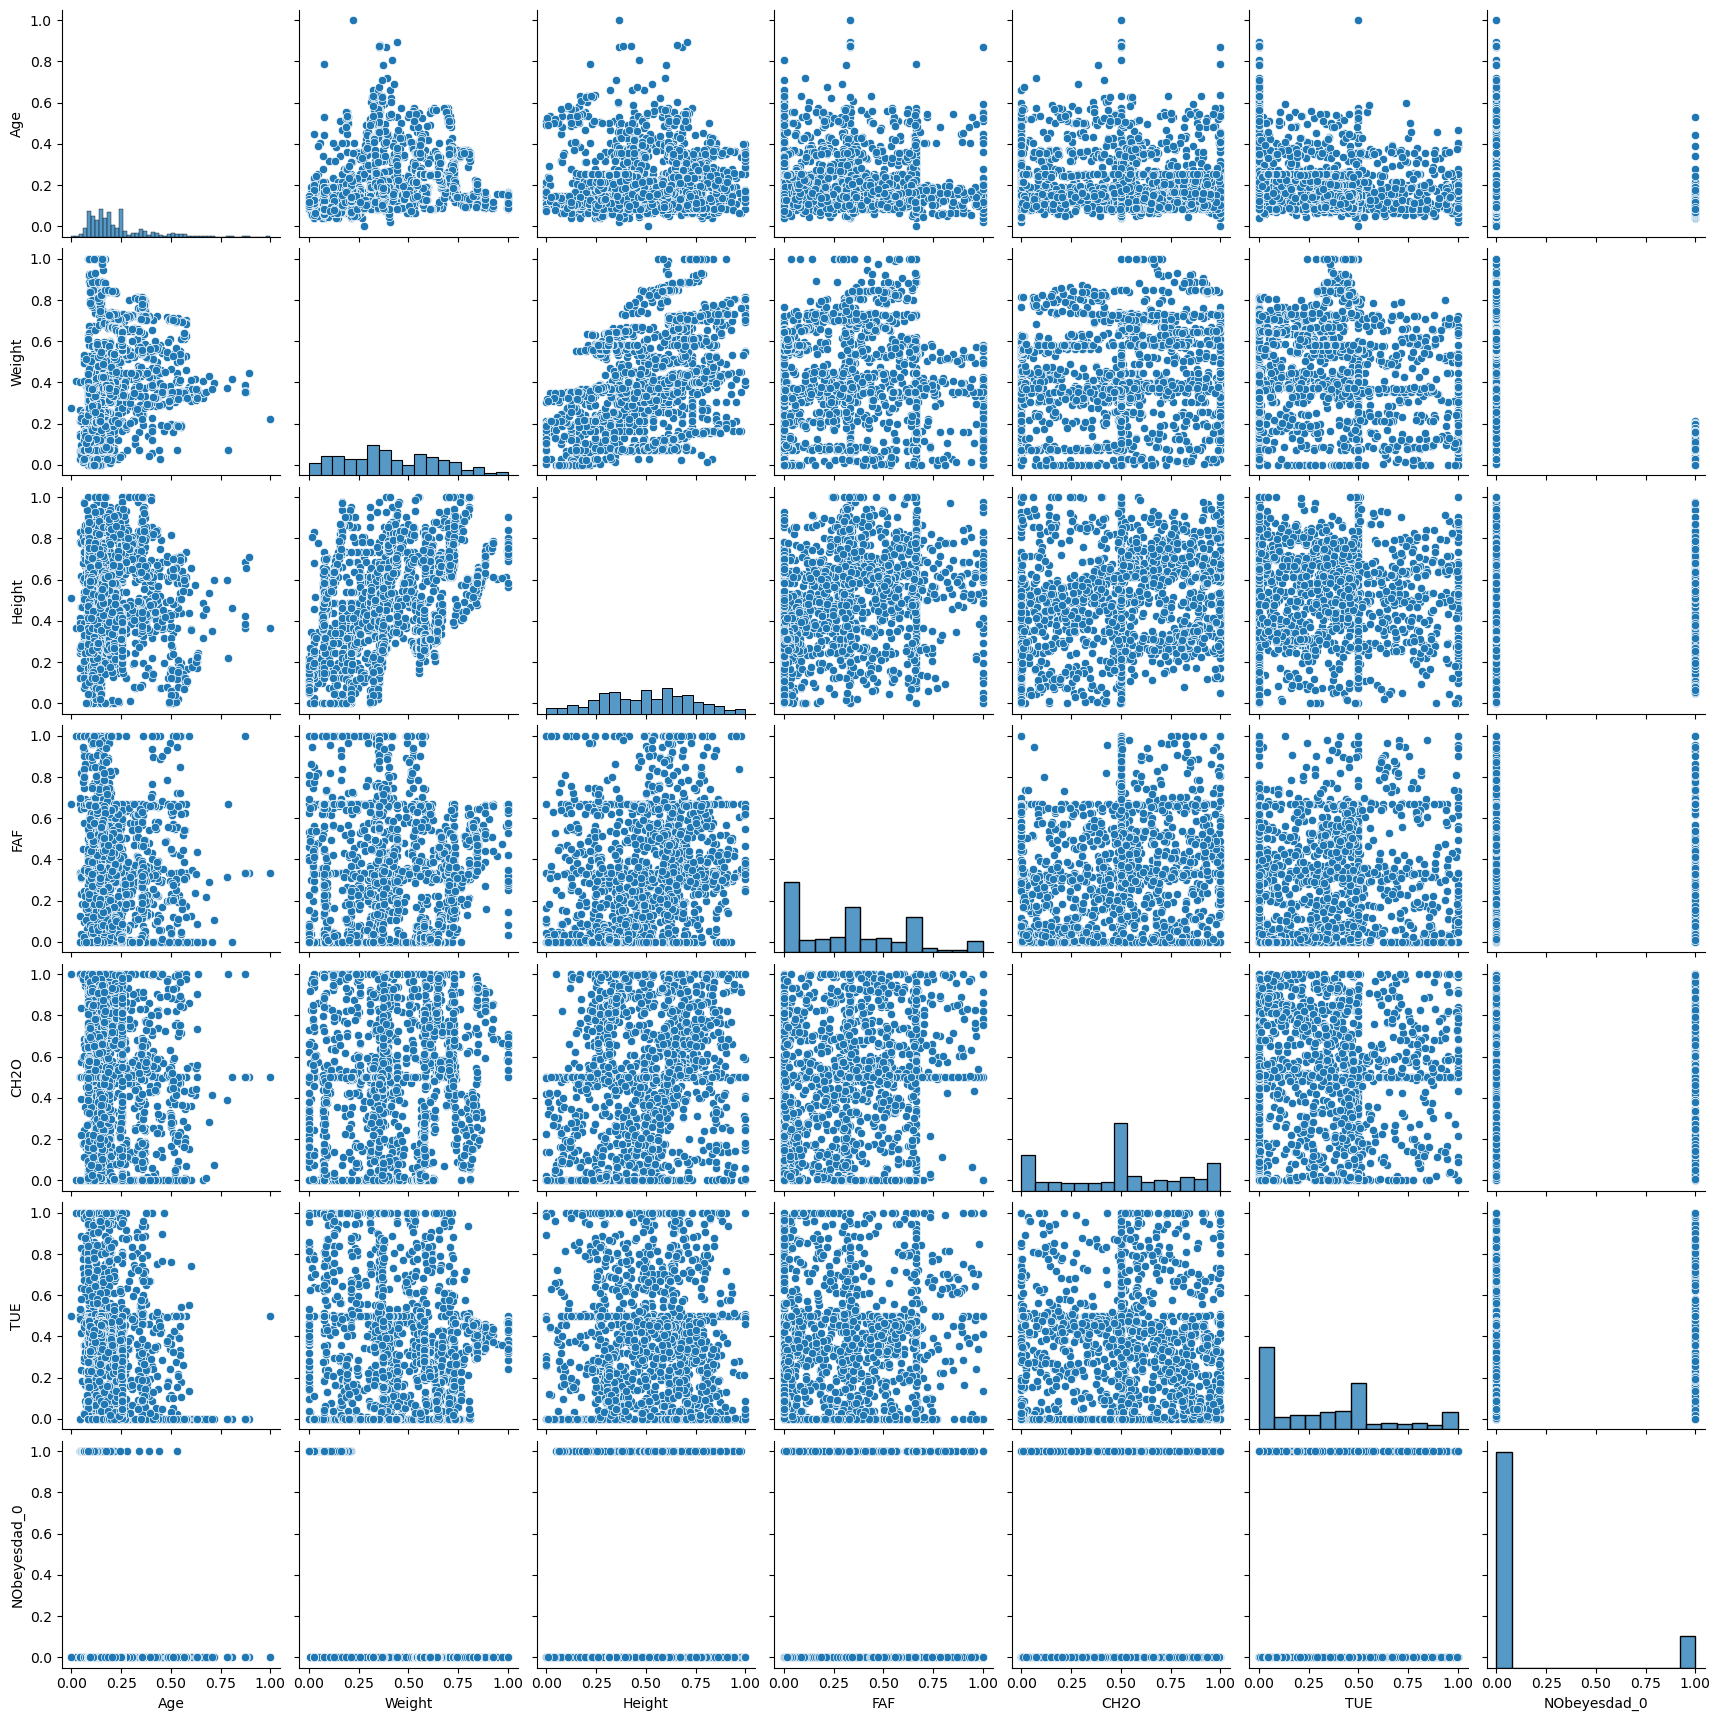

ValueError: could not convert string to float: 'yes'

In [269]:
# Creating pair plots, feature importance plots (for Random Forest), and a heatmap of the confusion matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming 'NObeyesdad_0' is the target variable 
X = data.drop(['NObeyesdad_0', 'NObeyesdad_1', 'NObeyesdad_2', 'NObeyesdad_3', 'NObeyesdad_4', 'NObeyesdad_5', 'NObeyesdad_6'], axis=1)
y = data['NObeyesdad_0'] 


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create pair plots for selected features
sns.pairplot(data[['Age', 'Weight', 'Height', 'FAF', 'CH2O', 'TUE', 'NObeyesdad_0']])
plt.show()


# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
  print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [270]:
# Spliting the data into training (80%) and testing (20%) 


# Features
features = ['Age', 'Height', 'Weight', 'FAF', 'CH2O', 'TUE']
X = data[features]

# Iterate through each obesity level and create train/test splits
for i in range(7):  # Assuming 7 obesity levels (NObeyesdad_0 to NObeyesdad_6)
    target_variable = f'NObeyesdad_{i}'
    y = data[target_variable]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"Train/test split for {target_variable}:")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")
    print("-" * 20)

Train/test split for NObeyesdad_0:
X_train shape: (1688, 6)
X_test shape: (423, 6)
y_train shape: (1688,)
y_test shape: (423,)
--------------------
Train/test split for NObeyesdad_1:
X_train shape: (1688, 6)
X_test shape: (423, 6)
y_train shape: (1688,)
y_test shape: (423,)
--------------------
Train/test split for NObeyesdad_2:
X_train shape: (1688, 6)
X_test shape: (423, 6)
y_train shape: (1688,)
y_test shape: (423,)
--------------------
Train/test split for NObeyesdad_3:
X_train shape: (1688, 6)
X_test shape: (423, 6)
y_train shape: (1688,)
y_test shape: (423,)
--------------------
Train/test split for NObeyesdad_4:
X_train shape: (1688, 6)
X_test shape: (423, 6)
y_train shape: (1688,)
y_test shape: (423,)
--------------------
Train/test split for NObeyesdad_5:
X_train shape: (1688, 6)
X_test shape: (423, 6)
y_train shape: (1688,)
y_test shape: (423,)
--------------------
Train/test split for NObeyesdad_6:
X_train shape: (1688, 6)
X_test shape: (423, 6)
y_train shape: (1688,)
y_test

In [271]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features
features = ['Age', 'Height', 'Weight', 'FAF', 'CH2O', 'TUE']
X = data[features]

# Iterate through each obesity level and train/evaluate models
for i in range(7):
    target_variable = f'NObeyesdad_{i}'
    y = data[target_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Logistic Regression
    logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter
    logreg_model.fit(X_train, y_train)
    logreg_pred = logreg_model.predict(X_test)
    logreg_accuracy = accuracy_score(y_test, logreg_pred)
    print(f"Logistic Regression - {target_variable}:")
    print(f"Accuracy: {logreg_accuracy}")
    print(classification_report(y_test, logreg_pred))

    # Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    print(f"Random Forest - {target_variable}:")
    print(f"Accuracy: {rf_accuracy}")
    print(classification_report(y_test, rf_pred))
    print("-" * 20)


Logistic Regression - NObeyesdad_0:
Accuracy: 0.9905437352245863
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       367
         1.0       0.98      0.95      0.96        56

    accuracy                           0.99       423
   macro avg       0.99      0.97      0.98       423
weighted avg       0.99      0.99      0.99       423

Random Forest - NObeyesdad_0:
Accuracy: 0.9881796690307328
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       367
         1.0       0.96      0.95      0.95        56

    accuracy                           0.99       423
   macro avg       0.98      0.97      0.97       423
weighted avg       0.99      0.99      0.99       423

--------------------
Logistic Regression - NObeyesdad_1:
Accuracy: 0.8557919621749409
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       361
         1.0       0.60    

C:\Users\Nas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest - NObeyesdad_2:
Accuracy: 0.9787234042553191
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       345
         1.0       0.99      0.90      0.94        78

    accuracy                           0.98       423
   macro avg       0.98      0.95      0.96       423
weighted avg       0.98      0.98      0.98       423

--------------------
Logistic Regression - NObeyesdad_3:
Accuracy: 0.8557919621749409
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       365
         1.0       0.43      0.16      0.23        58

    accuracy                           0.86       423
   macro avg       0.65      0.56      0.57       423
weighted avg       0.82      0.86      0.83       423

Random Forest - NObeyesdad_3:
Accuracy: 0.9905437352245863
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       365
         1.0       1.00      0.93

C:\Users\Nas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest - NObeyesdad_5:
Accuracy: 0.966903073286052
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       367
         1.0       0.96      0.79      0.86        56

    accuracy                           0.97       423
   macro avg       0.96      0.89      0.92       423
weighted avg       0.97      0.97      0.97       423

--------------------
Logistic Regression - NObeyesdad_6:
Accuracy: 0.8817966903073287
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       373
         1.0       0.00      0.00      0.00        50

    accuracy                           0.88       423
   macro avg       0.44      0.50      0.47       423
weighted avg       0.78      0.88      0.83       423



C:\Users\Nas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest - NObeyesdad_6:
Accuracy: 0.9763593380614657
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       373
         1.0       1.00      0.80      0.89        50

    accuracy                           0.98       423
   macro avg       0.99      0.90      0.94       423
weighted avg       0.98      0.98      0.98       423

--------------------


In [272]:
# Evaluating the models 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Evaluate the models using different metrics
for i in range(7):
    target_variable = f'NObeyesdad_{i}'
    y = data[target_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Logistic Regression
    logreg_model = LogisticRegression(max_iter=1000)
    logreg_model.fit(X_train, y_train)
    logreg_pred = logreg_model.predict(X_test)
    logreg_accuracy = accuracy_score(y_test, logreg_pred)
    logreg_precision = precision_score(y_test, logreg_pred, average='weighted', zero_division=1)
    logreg_recall = recall_score(y_test, logreg_pred, average='weighted', zero_division=1)
    logreg_f1 = f1_score(y_test, logreg_pred, average='weighted', zero_division=1)

    print(f"Logistic Regression - {target_variable}:")
    print(f"Accuracy: {logreg_accuracy}")
    print(f"Precision: {logreg_precision}")
    print(f"Recall: {logreg_recall}")
    print(f"F1-score: {logreg_f1}")


    # Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_precision = precision_score(y_test, rf_pred, average='weighted', zero_division=1)
    rf_recall = recall_score(y_test, rf_pred, average='weighted', zero_division=1)
    rf_f1 = f1_score(y_test, rf_pred, average='weighted', zero_division=1)

    print(f"Random Forest - {target_variable}:")
    print(f"Accuracy: {rf_accuracy}")
    print(f"Precision: {rf_precision}")
    print(f"Recall: {rf_recall}")
    print(f"F1-score: {rf_f1}")

    print("-" * 20)


Logistic Regression - NObeyesdad_0:
Accuracy: 0.9905437352245863
Precision: 0.9904946173181195
Recall: 0.9905437352245863
F1-score: 0.9904706173670095
Random Forest - NObeyesdad_0:
Accuracy: 0.9881796690307328
Precision: 0.9881129752660742
Recall: 0.9881796690307328
F1-score: 0.9881344653381126
--------------------
Logistic Regression - NObeyesdad_1:
Accuracy: 0.8557919621749409
Precision: 0.8209112400601762
Recall: 0.8557919621749409
F1-score: 0.7997256409528212
Random Forest - NObeyesdad_1:
Accuracy: 0.9621749408983451
Precision: 0.961455782358505
Recall: 0.9621749408983451
F1-score: 0.9616487245113938
--------------------
Logistic Regression - NObeyesdad_2:
Accuracy: 0.8156028368794326
Precision: 0.8496051506463457
Recall: 0.8156028368794326
F1-score: 0.7327681737588653
Random Forest - NObeyesdad_2:
Accuracy: 0.9787234042553191
Precision: 0.9788664287465606
Recall: 0.9787234042553191
F1-score: 0.9783304593173945
--------------------
Logistic Regression - NObeyesdad_3:
Accuracy: 0.85

In [273]:
# Feature importance
importance = rf_model.feature_importances_
features = ['Age', 'Height', 'Weight', 'FAF', 'CH2O', 'TUE']

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

  Feature  Importance
2  Weight    0.355141
1  Height    0.227643
0     Age    0.175697
3     FAF    0.089541
5     TUE    0.077501
4    CH2O    0.074477
